# Query 3.1

## Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled. Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column. Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial. (Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)

In [1]:
import pandas as pd
gold_data = pd.read_csv('GOLD.csv')
gold_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [2]:
gold_data.set_index('Date',inplace=True)
gold_data

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


In [3]:
gold_without_nan = gold_data.dropna()
gold_without_nan

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Dec 04, 2018",30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081
"Dec 05, 2018",30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101
"Dec 06, 2018",31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186


Slope: [[-0.00823083]]
Intercept: [343.67028421]
Root mean squared error:  73300.46132887459
R2 score:  3.732507600850976e-05


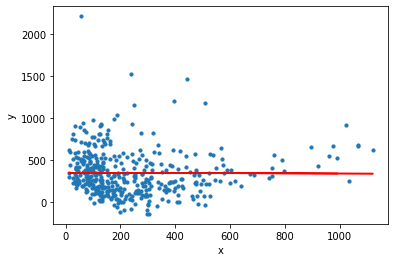

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#dataset
y = np.array(gold_without_nan["Pred"])
x = np.array(gold_without_nan["new"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# sckit-learn implementation
# Model initialization

regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

In [5]:
pre_data = gold_data[:]
pre_data_new = pre_data['new']
pre_data_new = pre_data_new.values.reshape(-1,1)
na_data = (regression_model.predict(pre_data_new))#getting predicted values
gold_data['Pred'] = na_data
gold_data

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,342.702580,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,341.238649,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,342.582797,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,342.836517,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,342.747169,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,341.635810,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,343.240625,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,342.737786,113.293305


Slope: [[-121.49444741]]
Intercept: [41754.03127127]
Root mean squared error:  1.2291678799353053e-23
R2 score:  1.0


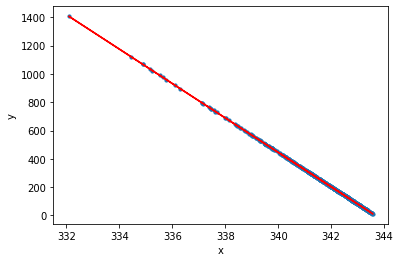

In [6]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#dataset
y = np.array(gold_data["new"])
x = np.array(gold_data["Pred"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# sckit-learn implementation
# Model initialization

regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

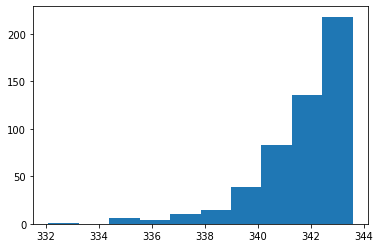

In [7]:
import matplotlib.pyplot as plt
plt.hist(gold_data['Pred'])
plt.show()

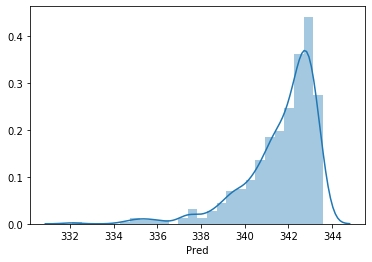

In [8]:
import seaborn as sns
sns.distplot(gold_data['Pred'])
plt.show()

# Query 3.2 Import the stock of your choosing AND the Nifty index.

## Using linear regression (OLS), calculate -

The daily Beta value for the past 3 months. (Daily= Daily returns)
The monthly Beta value. (Monthly= Monthly returns)

### Whilst:

Refrain from using the (covariance(x,y)/variance(x)) formula.
Attempt the question using regression.(Regression Reference)
Were the Beta values more or less than 1 ? What if it was negative ?
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

In [9]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split

In [14]:
import pandas as pd
ADANIPORTS =pd.read_csv(r"C:\Users\kodur/ADANIPORTS.csv", parse_dates=['Date'], index_col='Date' )
ADANIPORTS = ADANIPORTS[ ADANIPORTS.Series == 'EQ' ]
NIFTY50    =pd.read_csv(r'C:\Users\kodur/Nifty50_data.csv',parse_dates=['Date'], index_col='Date')

In [13]:
ADANIPORTS

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,ADANIPORTS,EQ,357.95,359.00,359.75,350.85,356.00,356.20,354.78,1530781,5.430939e+08,14738,554124,36.20
2017-05-16,ADANIPORTS,EQ,356.20,354.20,358.15,351.15,353.55,354.50,354.64,1321254,4.685718e+08,24113,465010,35.19
2017-05-17,ADANIPORTS,EQ,354.50,354.50,354.80,347.55,348.95,348.55,349.74,1239867,4.336325e+08,19750,571621,46.10
2017-05-18,ADANIPORTS,EQ,348.55,344.30,359.55,342.20,348.15,347.90,350.16,3618961,1.267198e+09,76390,963959,26.64
2017-05-19,ADANIPORTS,EQ,347.90,349.05,352.50,345.30,350.45,349.45,348.91,1302961,4.546103e+08,20989,492222,37.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,ADANIPORTS,EQ,379.80,381.00,383.95,370.10,370.40,371.90,377.07,1628805,6.141806e+08,41146,589474,36.19
2019-05-08,ADANIPORTS,EQ,371.90,370.05,374.90,367.70,369.50,369.80,371.65,1688110,6.273856e+08,66318,614190,36.38
2019-05-09,ADANIPORTS,EQ,369.80,369.90,370.70,361.10,363.30,363.90,364.77,1315271,4.797775e+08,26501,302972,23.03


In [15]:
NIFTY50

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...
2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86


# 3.2.1 - The daily Beta value for the past 3 months. (Daily= Daily returns)

#### This computes the linear regression correleation coefficent of the pct_change() between days.

Beta is 1.3592 for ADANIPORTS vs NIFTY50

In [16]:
prices = pd.concat([ ADANIPORTS['Close Price'], NIFTY50['Close'] ], axis=1)
prices.columns = ['ADANIPORTS', 'NIFTY50']
prices.head()

,ADANIPORTS,NIFTY50
Date,,
2017-05-15,356.20,9445.40
2017-05-16,354.50,9512.25
2017-05-17,348.55,9525.75
2017-05-18,347.90,9429.45
2017-05-19,349.45,9427.90


In [17]:
returns = prices.pct_change().dropna(axis=0)
returns.head()

,ADANIPORTS,NIFTY50
Date,,
2017-05-16,-0.004773,0.007078
2017-05-17,-0.016784,0.001419
2017-05-18,-0.001865,-0.010109
2017-05-19,0.004455,-0.000164
2017-05-22,0.014308,0.001098


In [18]:
X  = returns['NIFTY50']
Y  = returns['ADANIPORTS']
X1 = sm.add_constant(X)

model = OLS( Y, X1 )
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ADANIPORTS   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     165.4
Date:                Wed, 20 May 2020   Prob (F-statistic):           7.89e-33
Time:                        11:49:07   Log-Likelihood:                 1313.3
No. Observations:                 493   AIC:                            -2623.
Df Residuals:                     491   BIC:                            -2614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.331      0.741      -0.002       0.001
NIFTY50        1.3592      0.106     12.861      0.000       1.152       1.567
==============================================================================
Omnibus:                      125.391   Durbin-Watson:                   2.391
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1075.176
Skew:                          -0.839   Prob(JB):                    3.38e-234
Kurtosis:                      10.037   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.2.2 - The monthly Beta value. (Monthly= Monthly returns)

##### Here we groupby year+month, taking the last price of each month rather than each day. Then recompute the linear regression correleation coefficient of the pct_change() between the index and the stock.

Monthly Beta is 1.7670

In [19]:
NIFTY50['month']    = NIFTY50.index.map(   lambda date: f"{date.year}-{date.month}")
ADANIPORTS['month'] = ADANIPORTS.index.map(lambda date: f"{date.year}-{date.month}")

In [20]:
NIFTY50_monthly    = NIFTY50.groupby('month').last()
ADANIPORTS_monthly = ADANIPORTS.groupby('month').last()
ADANIPORTS_monthly.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
month,,,,,,,,,,,,,,
2017-10,ADANIPORTS,EQ,429.80,430.25,432.95,425.60,430.75,430.35,428.69,3418248,1.465379e+09,31803,2609911,76.35
2017-11,ADANIPORTS,EQ,403.45,401.35,401.35,396.00,400.00,398.00,399.22,5552149,2.216524e+09,50201,4047659,72.90
2017-12,ADANIPORTS,EQ,398.70,401.15,407.15,399.30,406.70,405.65,403.21,3574054,1.441100e+09,43173,2014822,56.37
2017-5,ADANIPORTS,EQ,340.35,341.50,345.75,336.55,341.75,339.00,339.69,12190256,4.140920e+09,94792,9389385,77.02
2017-6,ADANIPORTS,EQ,364.50,364.00,365.80,360.55,364.90,363.05,363.05,1386974,5.035435e+08,19945,358630,25.86


In [21]:
returns_monthly = pd.concat([ ADANIPORTS_monthly['Close Price'], NIFTY50_monthly['Close'] ], axis=1).pct_change().dropna()
returns_monthly.columns = ['ADANIPORTS', 'NIFTY50']
returns_monthly.head()

,ADANIPORTS,NIFTY50
month,,
2017-11,-0.075171,-0.010522
2017-12,0.019221,0.029741
2017-5,-0.164304,-0.086362
2017-6,0.070944,-0.010430
2017-7,0.090483,0.058419


In [22]:
X  = returns_monthly['NIFTY50']
Y  = returns_monthly['ADANIPORTS']
X1 = sm.add_constant(X)

model = OLS( Y, X1 )
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ADANIPORTS   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     44.65
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.02e-06
Time:                        11:50:44   Log-Likelihood:                 33.258
No. Observations:                  24   AIC:                            -62.52
Df Residuals:                      22   BIC:                            -60.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0087      0.013     -0.674      0.507      -0.036       0.018
NIFTY50        1.7670      0.264      6.682      0.000       1.219       2.315
==============================================================================
Omnibus:                        0.265   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.067
Skew:                          -0.119   Prob(JB):                        0.967
Kurtosis:                       2.897   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""